In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#### binary classification hoti hai tab hum logistic regression use krte

In [2]:
pip install missingno

In [3]:
titanic = pd.read_csv("https://github.com/sukhioo7/dataset/blob/main/titanic.csv?raw=true")

In [4]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

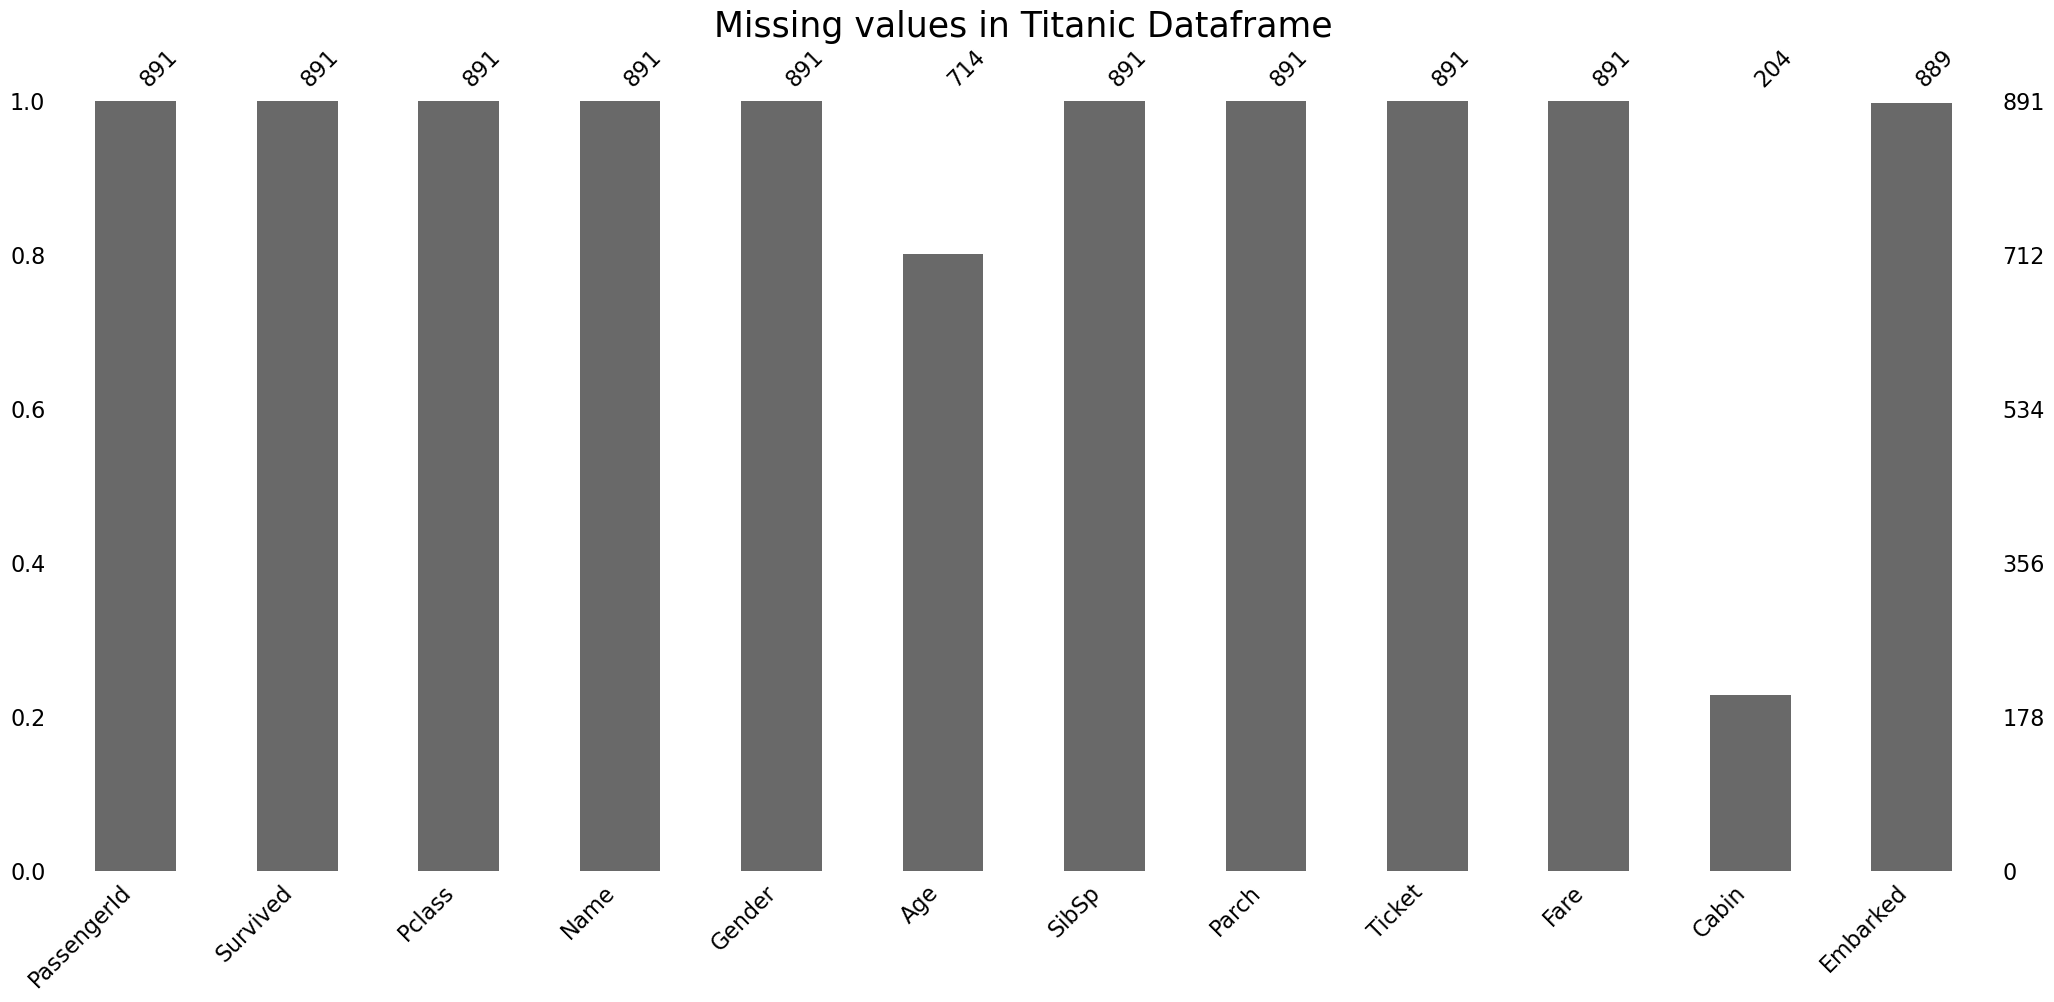

In [7]:
msno.bar(titanic)
plt.title('Missing values in Titanic Dataframe',size=25)
plt.show()

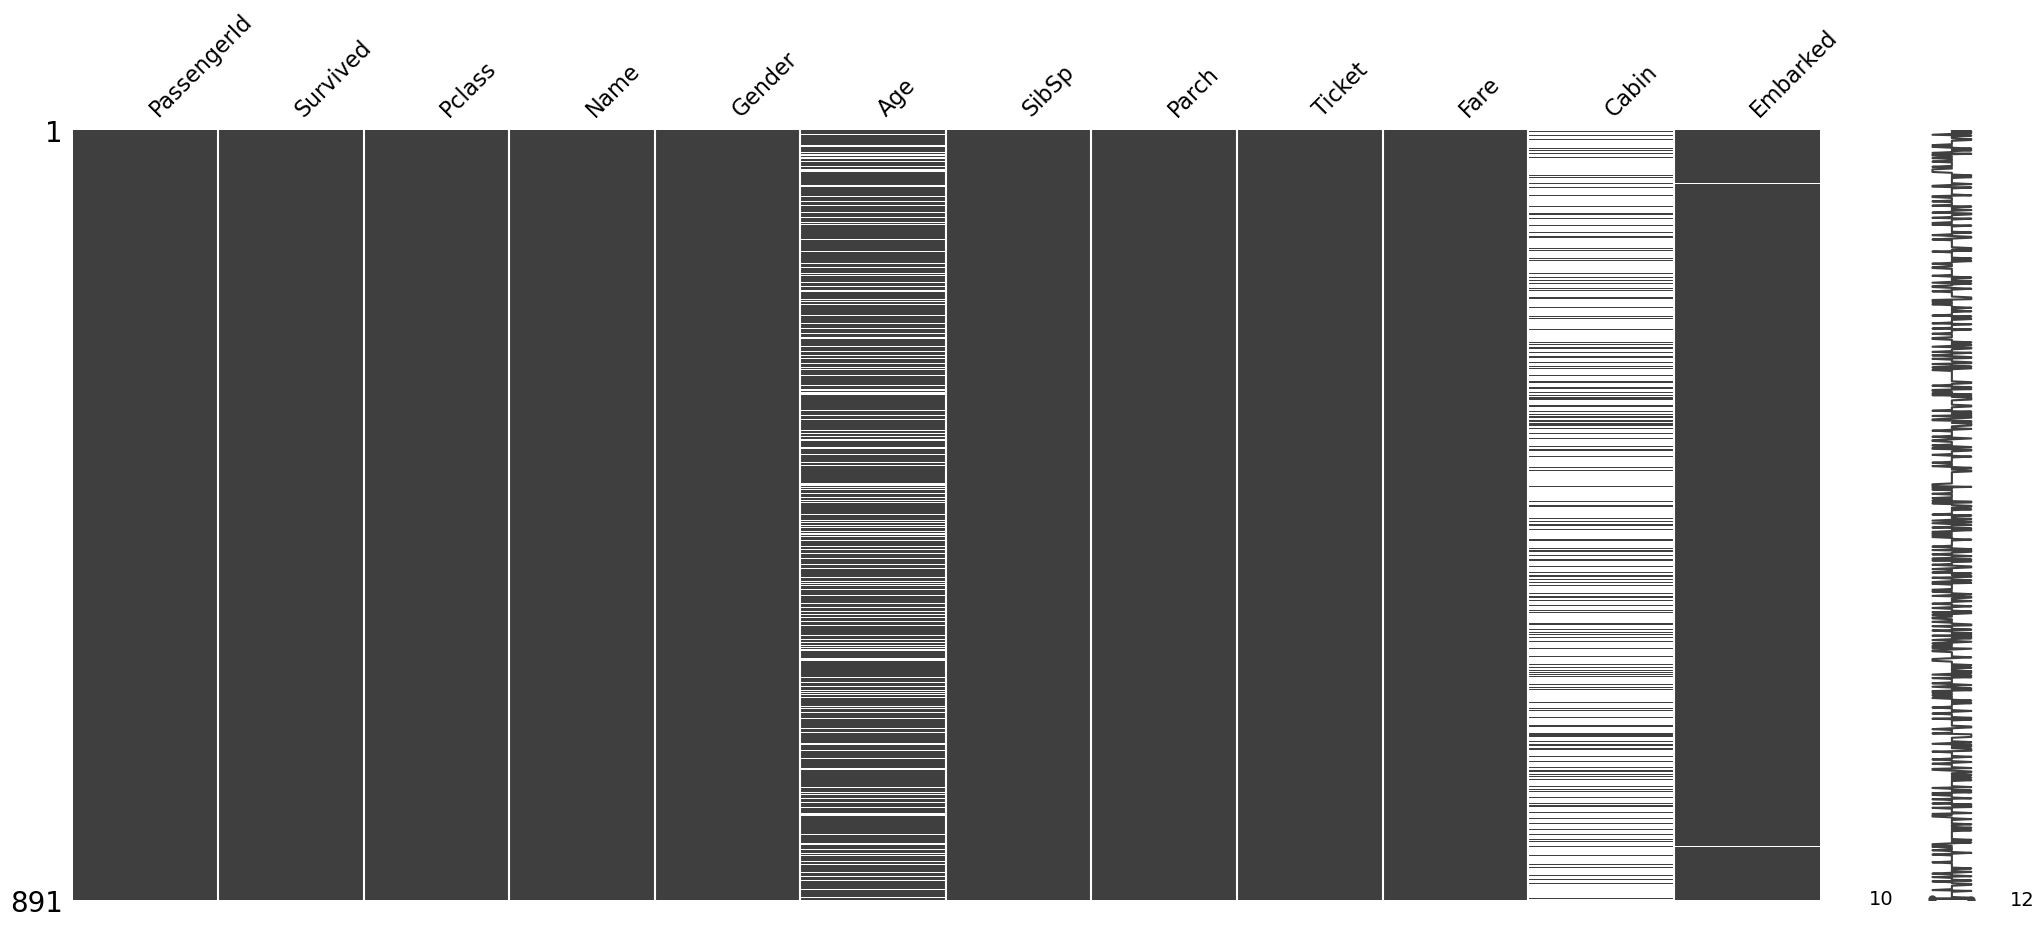

In [8]:
msno.matrix(titanic)
plt.show()

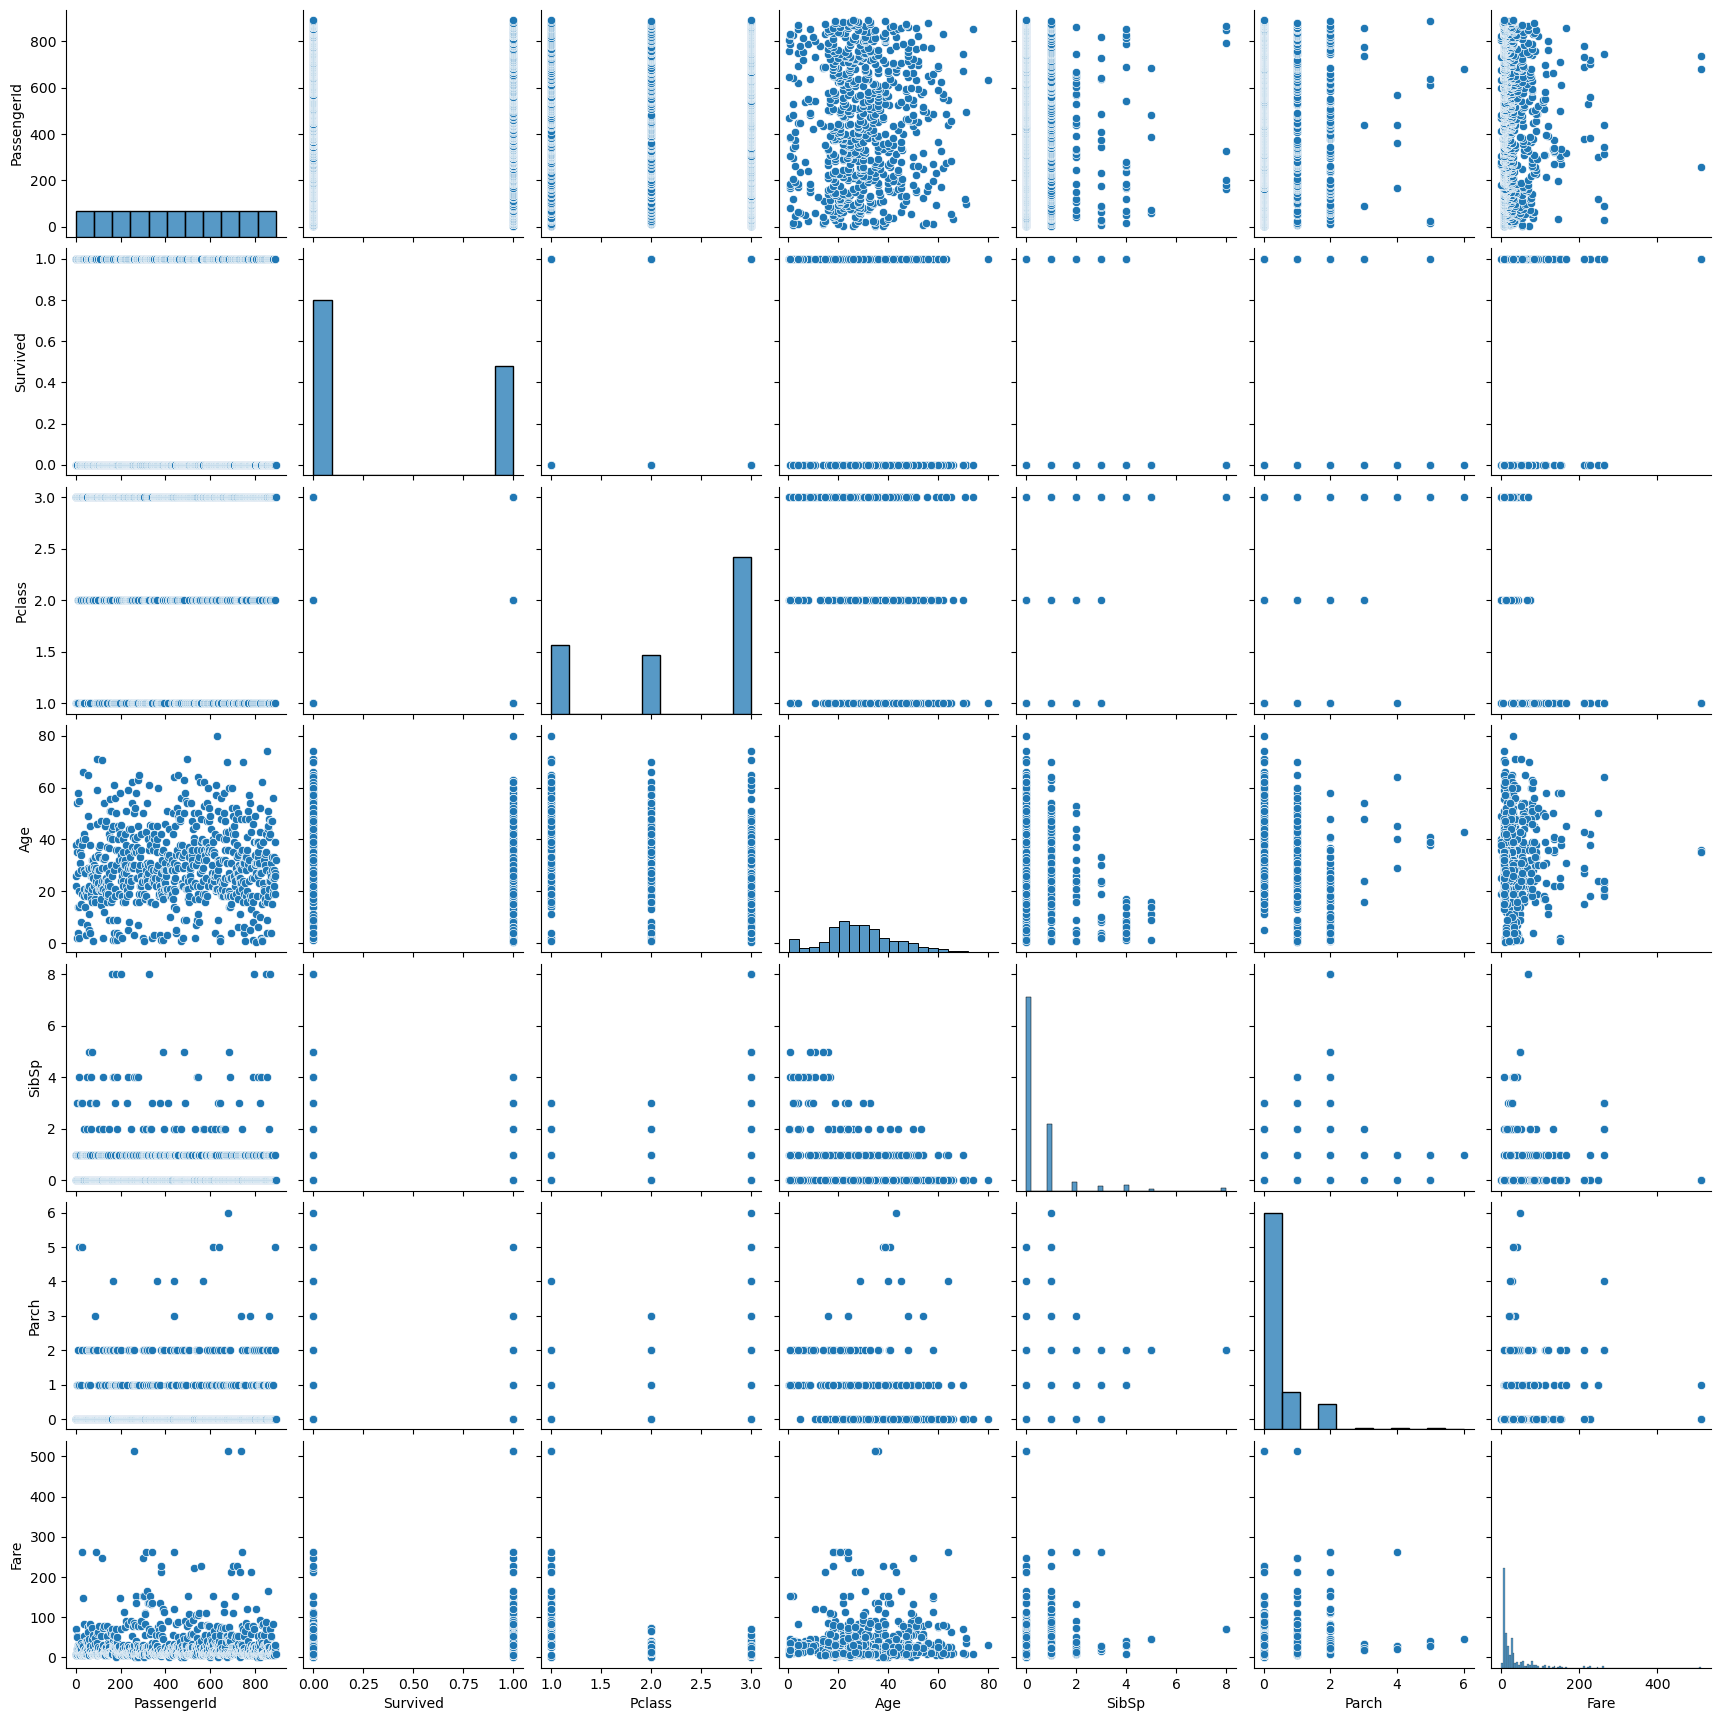

In [9]:
sns.pairplot(titanic)

<Axes: xlabel='Survived', ylabel='count'>

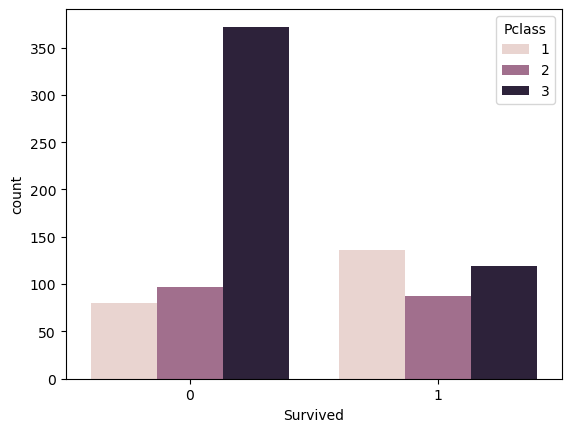

In [10]:
sns.countplot(data=titanic,x='Survived',hue='Pclass')

<Axes: xlabel='Survived', ylabel='Age'>

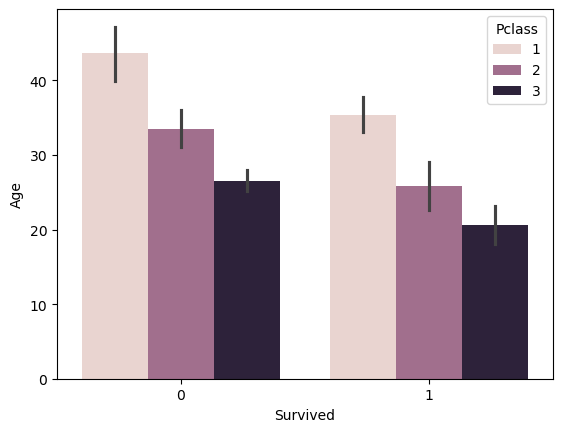

In [11]:
sns.barplot(data=titanic,x='Survived',y='Age',hue='Pclass')

<Axes: xlabel='Pclass', ylabel='Age'>

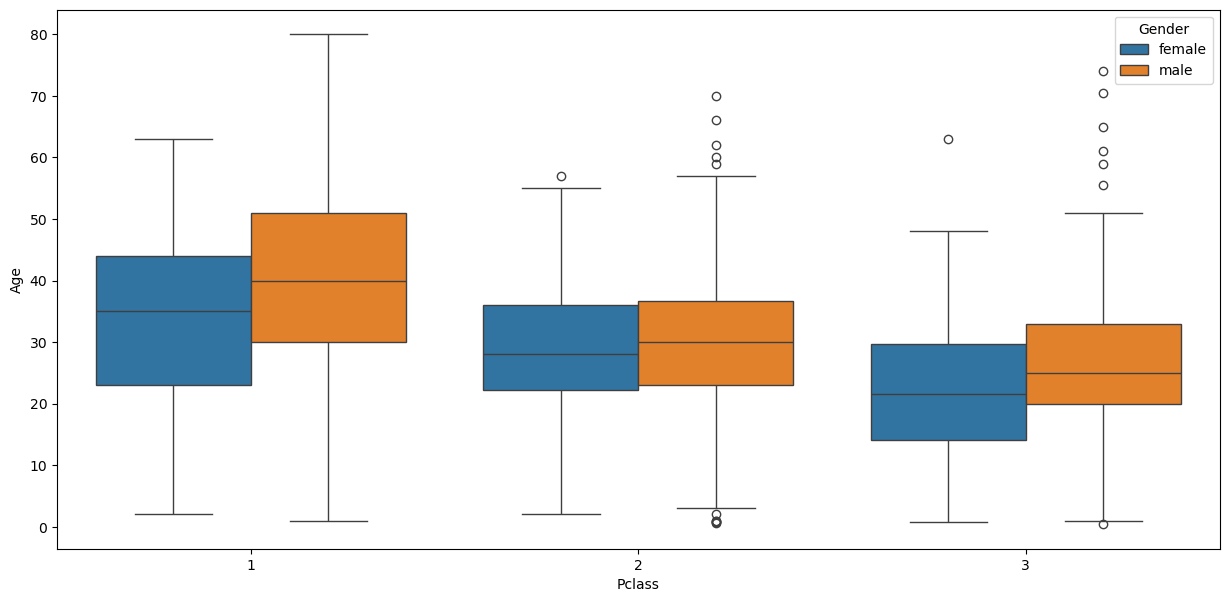

In [12]:
plt.figure(figsize=(15,7))
sns.boxplot(data=titanic,x='Pclass',y='Age',hue='Gender')

In [13]:
titanic.groupby(by='Pclass').median(numeric_only=True)

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,472.0,1.0,37.0,0.0,0.0,60.2875
2,435.5,0.0,29.0,0.0,0.0,14.2500
3,432.0,0.0,24.0,0.0,0.0,8.0500


In [14]:
titanic[titanic['Gender']=='male'].groupby(by='Pclass').median(numeric_only=True)['Age']

Pclass
1    40.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [15]:
titanic[titanic['Gender']=='female'].groupby(by='Pclass').median(numeric_only=True)['Age']

Pclass
1    35.0
2    28.0
3    21.5
Name: Age, dtype: float64

In [16]:
def fill_age (row):
    age = row['Age']
    pclass = row['Pclass']
    gender = row['Gender']
    if pd.isnull(age):
        if gender=='male':
            if pclass==1:
                return 40
            elif pclass==2:
                return 30
            else:
                return 25
        if gender=='female':
            if pclass==1:
                return 35
            elif pclass==2:
                return 28
            else:
                return 21

    else:
        return age    
        

In [17]:
def temp(row):
    print(row)

In [18]:
titanic['Age'] = titanic[['Age','Pclass','Gender']].apply(fill_age,axis=1)

In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
def fill_cabin(cabin):
    if pd.isnull(cabin):
        return 0
    else:
        return 1

In [21]:
titanic['Cabin']=titanic['Cabin'].apply(fill_cabin)

In [22]:
# titanic['Cabin'].apply(lambda cabin:0   if pd.isnull(cabin) else 1)

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [24]:
titanic['Gender'] = titanic['Gender'].map({'male':0,'female':1}) # map function done with dictonary it is for encoding like label encoder

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


In [26]:
titanic.dropna(inplace = True)
titanic.reset_index (drop=True,inplace=True)

In [27]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

In [28]:
one_hot.fit(titanic[['Embarked']])  #[[]] double bracket is because we need data in 2D and it give data in series so we use it

OneHotEncoder()

In [29]:
temp_arr = one_hot.transform(titanic[['Embarked']]).toarray() #toarray for converting it n array

In [30]:
temp_arr

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [31]:
one_hot.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [32]:
station = pd.DataFrame(temp_arr,columns=['C', 'Q', 'S'], dtype='int')

In [33]:
station.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [34]:
titanic = pd.concat([titanic,station],axis=1)

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S,0,0,1


In [36]:
titanic.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [37]:
titanic.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,0,1


In [38]:
X = titanic.drop('Survived',axis=1)
Y = titanic['Survived']

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [40]:
#sigmoid function

In [41]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

In [42]:
logistic_model.fit(X_train,Y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
predictions = logistic_model.predict(X_test)

In [44]:
Y_test.head()

510    0
612    0
614    1
336    1
717    0
Name: Survived, dtype: int64

In [45]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

### confusion matrix in machine learning

In [46]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(Y_test,predictions))

[[98  9]
 [22 49]]


In [47]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       107
           1       0.84      0.69      0.76        71

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



In [48]:
# SAVE model
import pickle as pk

In [53]:
# dump= save the model(which or where to save)
pk.dump(logistic_model,open('Titanic Model.pkl','wb')) #wb = write binary
pk.dump(one_hot,open('ONE HOT Model.pkl','wb')) 
# pk.dump(map,open('Label Model.pkl','wb')) 